# **ANSERING QUESTION 6**

---

## **IMPORT**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **ĐỌC DỮ LIỆU**

In [2]:
df = pd.read_csv('../Data/movie_data.csv')
df.head(5)

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action/Adventure,Animation,Biography/History/War,...,Drama,Fantasy/Sci-Fi,Horror/Thriller/Mystery,Kids/Family,Music/Musical,Other,Romance,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12398.815824,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,True,False,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,True,False,True,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,False,False,False,False,False,False,True,0.0,0.0,1


## **CÂU 6: Xu hướng khán giả (qua tỉ trọng `IMDb Votes`) đối với các thể loại phim theo từng nhóm tuổi Age rating là như thế nào?**

**Lợi ích của câu hỏi:**

- **Hiểu rõ mức độ quan tâm của khán giả**: Tỉ trọng IMDb Votes thể hiện mức độ yêu thích và quan tâm thực tế của khán giả đối với từng thể loại phim trong mỗi nhóm tuổi, giúp đánh giá chính xác thị hiếu.

- **Định hướng chiến lược sản xuất và đầu tư**: Nhà sản xuất và nhà đầu tư có thể dựa vào tỉ trọng bình chọn để ưu tiên phát triển các thể loại phim được khán giả ở từng độ tuổi ưa chuộng nhất, tối ưu hóa lợi nhuận.

- **Phát hiện xu hướng thị trường**: Tỉ trọng IMDb Votes có thể cho thấy sự thay đổi trong sở thích của từng nhóm tuổi, giúp các nhà phát hành phim cập nhật danh mục thể loại để thu hút khán giả.

- **Nâng cao chất lượng nền tảng xem phim**: Các nền tảng phân phối phim trực tuyến có thể gợi ý nội dung phù hợp hơn cho người dùng dựa trên xu hướng đã phân tích, cải thiện trải nghiệm cá nhân hóa.

**Cách thực hiện**:

- **Cột cần thiết**: `Age rating`, `IMDb Votes` và 13 cột thể loại

- **Tính toán**: Tính tần suất và tỉ trọng (phần trăm) của `IMDb Votes` cho từng thể loại trong mỗi nhóm tuổi

- **Trực quan hóa**: Dùng biểu đồ Heatmap với các hàng là các nhóm tuổi, mỗi cột đại diện cho một thể loại và màu sắc thể hiện tỉ trọng `IMDb Votes`

### **6.1. Tiền xử lý**

In [ ]:
# Gom nhóm dữ liệu dựa trên Age rating và thể loại phim
genres = ["Action/Adventure", "Animation", "Biography/History/War", "Comedy", "Crime", "Docummentary",
          "Drama", "Fantasy/Sci-Fi", "Horror/Thriller/Mystery", "Kids/Family", "Music/Musical", "Other"]

# Tính tổng số phim cho mỗi thể loại theo từng nhóm tuổi
grouped_data = df.groupby("Age rating")[genres].sum()
grouped_data

# Tính IMDb Votes cho từng thể loại
for genre in genres:
    df[genre + "_votes"] = df[genre] * df["IMDb Votes"]

# Tính tổng IMDb Votes của từng thể loại theo nhóm tuổi
grouped_votes = df.groupby("Age rating")[[col + "_votes" for col in genres]].sum()

# Đổi tên cột cho dễ đọc
grouped_votes.columns = genres

# Chuẩn hóa dữ liệu theo tỉ trọng (%) trong mỗi nhóm tuổi
grouped_percentage = grouped_votes.div(grouped_votes.sum(axis=1), axis=0) * 100

### **6.2. Trực quan hóa dữ liệu**

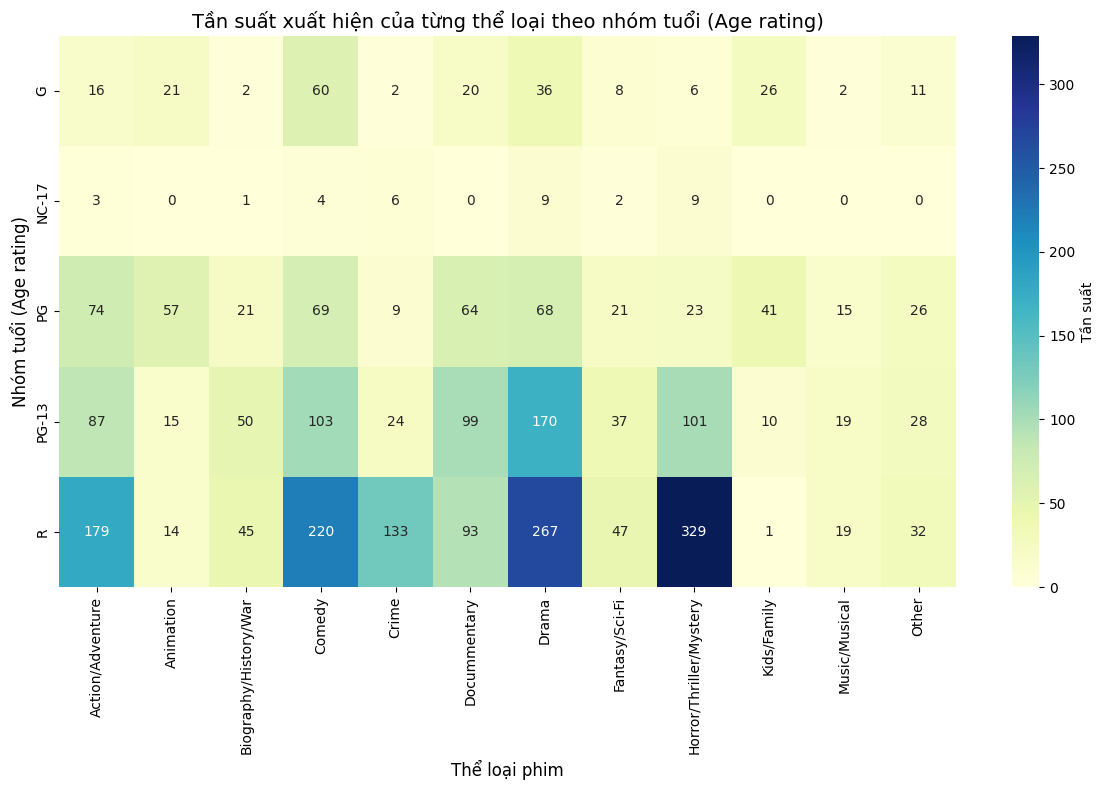

In [4]:
# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Tần suất"})

# Thiết lập tiêu đề và nhãn
title = "Tần suất xuất hiện của từng thể loại theo nhóm tuổi (Age rating)"
plt.title(title, fontsize=14)
plt.xlabel("Thể loại phim", fontsize=12)
plt.ylabel("Nhóm tuổi (Age rating)", fontsize=12)

plt.tight_layout()
plt.show()

**Nhận xét**

- **Nhóm tuổi G**: Các thể loại *Animation*, *Comedy*, và *Kids/Family* xuất hiện với tần suất cao nhất, phản ánh đặc trưng của phim hướng đến đối tượng gia đình và trẻ em.

- **Nhóm tuổi PG**: 

    - *Action/Adventure*, *Comedy*, và *Animation* chiếm tỉ lệ tần suất cao.

    - Các thể loại *Drama* và *Fantasy/Sci-Fi* cũng xuất hiện nhiều hơn so với nhóm tuổi **G**.

- **Nhóm tuổi PG-13**: Tần suất của *Drama*, *Horror/Thriller/Mystery*, và Fantasy/Sci-Fi tăng đáng kể so với **PG**, cho thấy sự mở rộng trong nội dung phim dành cho khán giả tuổi thiếu niên lớn hơn.

- **Nhóm tuổi R**: 

    - Tần suất xuất hiện của *Drama*, *Horror/Thriller/Mystery*, và *Comedy* rất cao.

    - *Action/Adventure* và *Crime* cũng phổ biến trong nhóm này, phù hợp với khán giả trưởng thành.

    - Các thể loại như *Animation* và *Kids/Family* gần như không xuất hiện.

- **Nhóm tuổi NC-17**: Xu hướng tập trung vào các thể loại như *Documentary*, *Drama*, và *Comedy*, với các thể loại còn lại gần như không xuất hiện.

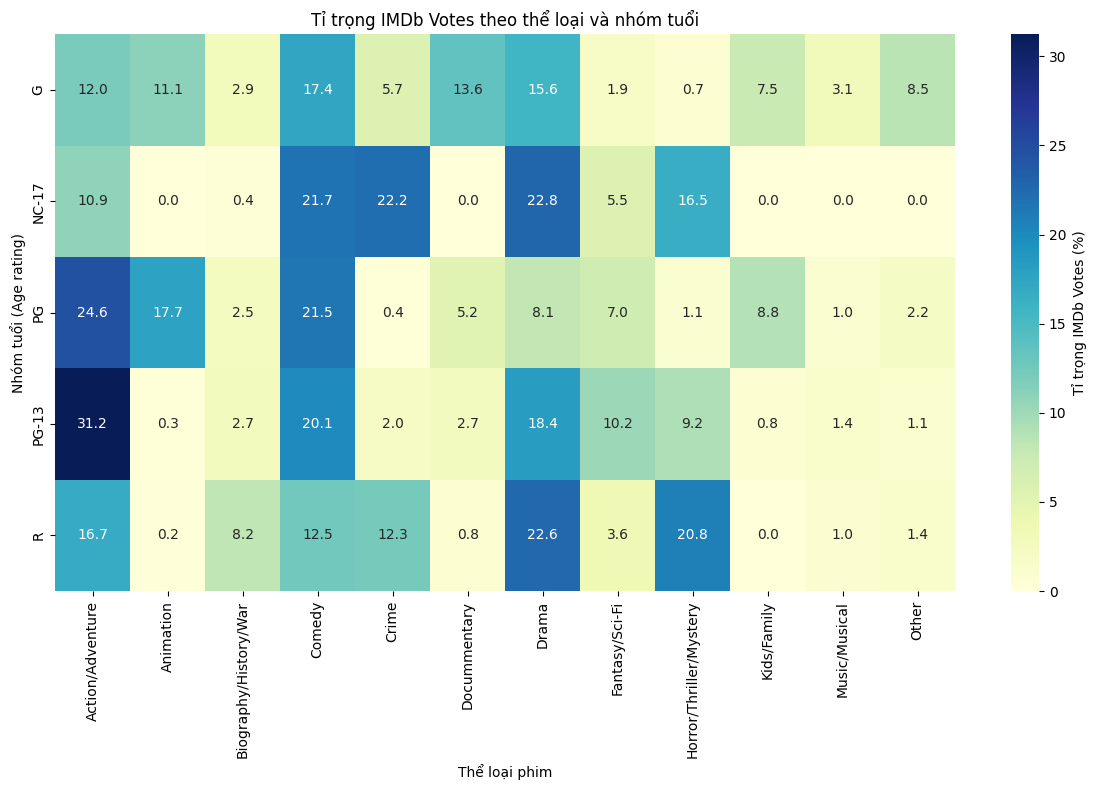

In [5]:
# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_percentage, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Tỉ trọng IMDb Votes (%)'})
plt.title("Tỉ trọng IMDb Votes theo thể loại và nhóm tuổi")
plt.xlabel("Thể loại phim")
plt.ylabel("Nhóm tuổi (Age rating)")
plt.tight_layout()
plt.show()

**Nhận xét**

- **Nhóm tuổi G**: 

    - *Romance* chiếm tỉ trọng IMDb Votes cao nhất, cho thấy dù thể loại này xuất hiện ít nhưng lại thu hút sự quan tâm lớn.

    - *Animation* và *Drama* có tỉ trọng IMDb Votes tương đối cao, phản ánh sở thích của khán giả trẻ và gia đình.

- **Nhóm tuổi PG**: 

    - *Action/Adventure* và *Comedy* không chỉ xuất hiện với tần suất cao mà còn nhận được tỉ trọng IMDb Votes lớn.

    - *Animation* cũng có tỉ trọng đáng kể, phù hợp với xu hướng gia đình và trẻ em.

- **Nhóm tuổi PG-13**: 

    - *Action/Adventure* dẫn đầu cả về tần suất lẫn tỉ trọng IMDb Votes, cho thấy đây là thể loại được yêu thích nhất ở nhóm tuổi này.

    - Các thể loại *Comedy*, *Drama*, và *Horror/Thriller/Mystery* có tỉ trọng IMDb Votes cao, khẳng định sự đa dạng trong thị hiếu của nhóm tuổi này.

- **Nhóm tuổi R**: 

    - *Drama* và *Horror/Thriller/Mystery* có tỉ trọng IMDb Votes rất cao, tương ứng với tần suất xuất hiện cao của chúng.

    - Các thể loại nhẹ nhàng như *Animation* không nhận được nhiều sự quan tâm từ khán giả nhóm này.

- **Nhóm tuổi NC-17**: *Documentary* và *Drama* nhận được tỉ trọng IMDb Votes cao nhất, phản ánh xu hướng khán giả trưởng thành ưa chuộng các nội dung sâu sắc.

### **6.3. Nhận xét**

- **Nhóm tuổi G**: Phim hoạt hình và gia đình xuất hiện nhiều nhưng chỉ một số thể loại như *Romance* tạo được sự nổi bật trong nhóm tuổi này.

- **Nhóm tuổi PG**: *Action/Adventure* và *Comedy* vừa có tần suất cao vừa nhận được sự quan tâm lớn từ khán giả (IMDb Votes cao). Đây là hai thể loại chủ đạo trong nhóm PG, rất phù hợp với khán giả gia đình và trẻ em.

- **Nhóm tuổi PG-13**: Thị hiếu của khán giả tuổi PG-13 rất đa dạng, với *Action/Adventure* là thể loại chủ đạo.

- **Nhóm tuổi R**: Thể loại phim có nội dung kịch tính, tâm lý và giật gân là lựa chọn ưa thích của nhóm này.

- **Nhóm tuổi NC-17**: Nội dung sâu sắc và đặc thù là tiêu chí của khán giả nhóm NC-17.